# <span style="color:blue;">Zadanie domowe - EDA Danych dotyczących Titanica

### 1. Cel analizy

Celem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`26__titanic.csv`).
Ponieważ kolumn z danymi jest dużo, nie będę analizował połączenia wszystkiego ze wszystkim. Skupię się na analizie przeżywalności pasażerów - od czego ona zależała. Dodatkowo jako miłośnik takich programów jak Discovery i National Geographic, zbadam czy tezy postawione przez twórców filmów dokumentalnych mają pokrycie w danych w załączonym pliku:
* Teza: Dorosły mężczyzna z klasy I miał większe szanse przeżycia niż dziecko z klasy III

Dodatkowo przyjęto założenie, że dzieci (osoby niepełnoletnie) to osoby w wieku poniżej 18 lat (niektóre źródła z epoki przyjmowały 14 lat)

### 2. Pozyskanie i ogólne zrozumienie danych

Dane o pasażerach Titanica - dane pozyskano z załączonego pliku CSV (`26__titanic.csv`)

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób (z czego ponad 800 osób stanowiła załoga). Z ogólnej liczby 2200 osób ponad 1,500 zginęło, co czyni tę katastrofę być może jedną z najbardziej
tragicznych w historii morskiej, a na pewno najbardziej głośną.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

### 3. Przygotowanie danych (Data Cleaning i Preprocessing)

In [292]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [293]:
df = pd.read_csv('26__titanic.csv', sep=",")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [294]:
# Eksport danych do pliku Excel - przyjrzenie się danym
# w programu Excel pozwala wstępnie ocenić dane
df.to_excel("piotr_26.xlsx")

In [295]:
df.info()
#Podsumowanie informacji o DataFrame.
#Pokazuje: liczbę wierszy i kolumn,nazwy kolumn,typy danych (int64, float64, object, itp.),
#liczbę niepustych wartości w każdej kolumnie,pamięć zajmowaną przez DataFrame.
#Użyteczne do szybkiego sprawdzenia struktury danych i obecności braków.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [296]:
# Pokaż ilośći typów każdej klasy 
df['pclass'].value_counts()

3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64

In [297]:
# Pokaż wszystkie rekordy
#pd.set_option('display.max_rows', 20) #None)
#df

In [298]:
df.nunique()
#Zwraca liczbę unikalnych wartości w każdej kolumnie (Domyślnie nie liczy wartości NaN.)
# Wynik to Series, gdzie indeks to nazwy kolumn, a wartości to liczby unikatów.

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [299]:
df.describe(include="all").T
#Tworzy statystyczne podsumowanie danych numerycznych (domyślnie).
#Dla kolumn liczbowych podaje m.in.:
#count – liczba niepustych wartości, mean – średnia, std – odchylenie standardowe,min, 25%, 50% (mediana), 75%, max.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
survived,1309.0,NaN,NaN,NaN,0.381971,0.486055,0.0,0.0,0.0,1.0,1.0
name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1046.0,NaN,NaN,NaN,29.881135,14.4135,0.1667,21.0,28.0,39.0,80.0
sibsp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0
parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
ticket,1309,929,CA. 2343,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292
cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [300]:
# Sprawdzenie ile brakujących wartości jest w naszych danych
df.isnull().sum()  

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

Widać, że jest jeden wiersz z pustymi wartościami. Ponadto duże braki są w kolumnie 'age'

In [301]:
#Usuwanie pustych kolumn i wierszy
df = df.dropna(how="all")
#df.to_excel("piotr_26.xlsx")
#df.head()

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 153.4+ KB


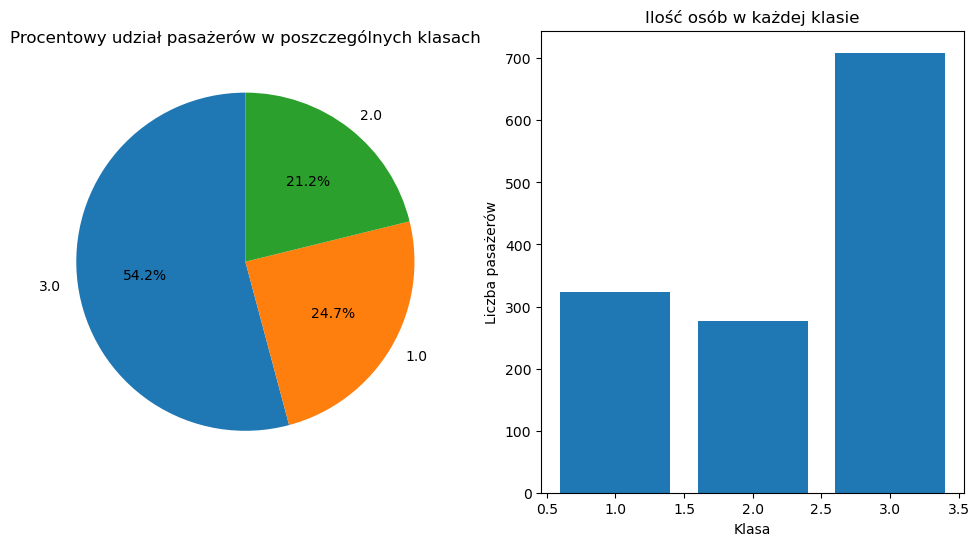

In [303]:
# Pokaż 'Procentowy udział pasażerów z Titanica w poszczególnych klasach' na wykresie kołowym, a obok na wykresie słupkowym ilość osób w każdej klasie.
# Import the required dependencies
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the Titanic data
df = df

# Drop rows with NaN values in 'pclass' column
df = df.dropna(subset=['pclass'])

# Calculate the percentage of passengers in each class
class_counts = df['pclass'].value_counts()
class_percentages = class_counts / class_counts.sum() * 100

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot pie chart for percentage of passengers in each class
ax1.pie(class_percentages, labels=class_percentages.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Procentowy udział pasażerów w poszczególnych klasach')

# Plot bar chart for number of passengers in each class
ax2.bar(class_counts.index, class_counts.values)
ax2.set_title('Ilość osób w każdej klasie')
ax2.set_xlabel('Klasa')
ax2.set_ylabel('Liczba pasażerów')

plt.show()

Jak widać z załączonych wykresów największę część pasażerów stanowiły osoby z klasy III (54,2%)

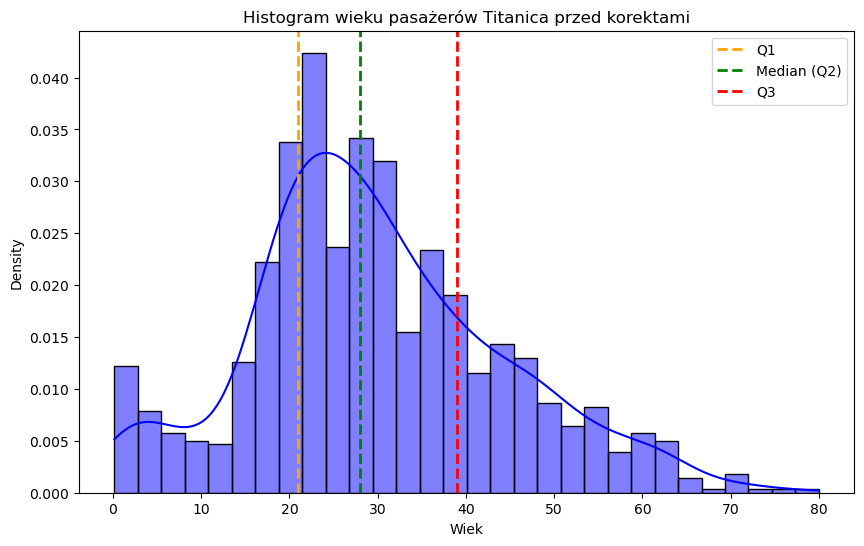

In [304]:
# Drop NaN values from the 'age' column for plotting
age_data = df['age'].dropna()

# Create a histogram with a trend line
plt.figure(figsize=(10, 6))
sns.histplot(age_data, bins=30, kde=True, color='blue', stat="density")

# Calculate quartiles
q1 = age_data.quantile(0.25)
q2 = age_data.median()
q3 = age_data.quantile(0.75)

# Add lines for Q1, Q2, and Q3
plt.axvline(q1, color='orange', linestyle='--', linewidth=2, label='Q1')
plt.axvline(q2, color='green', linestyle='--', linewidth=2, label='Median (Q2)')
plt.axvline(q3, color='red', linestyle='--', linewidth=2, label='Q3')
plt.legend()

# Add labels and title
plt.xlabel('Wiek')
plt.ylabel('Density')
plt.title('Histogram wieku pasażerów Titanica przed korektami')

# Save the plot as a PNG file
##plt.savefig('age_histogram_with_trend.png')
plt.show()

Na statku przebywały osoby od zera do 80 lat, wiek przeciętnego pasażera wynosił 30,28 lat.
W kolumnie z wiekiem mamy dużą ilość braków.
W przypadku brakującego wieku dziecka, uzupełniłem braki liczbą 8.5 (przyjęto, że dziecko (niepełnoletnie) występuje w sytuacji gdy kolumna 'Parch" ma wartość większą lub równą 1 oraz w kolumnie Name występuje tytuł osoby 'Miss.' lub 'Master.').
W pozostałych przypadkach braki uzupełniłem "przeciętnym wiekiem osoby dorosłej".

In [328]:
# Replace NaN values in 'age' column with 8.5 where 'parch' >= 1
# and 'name' contains 'Miss.' or 'Master.'
condition = (df['parch'] >= 1) & (df['name'].str.contains('Miss\.|Master\.', na=False))
df.loc[condition, 'age'] = df.loc[condition, 'age'].fillna(8.5)

In [329]:
#"przeciętny wiek osoby dorosłej"
# Calculate the mean age for age >= 18
mean_age = df[df['age'] >= 18]['age'].mean()

# Round the result to two decimal places
rounded_mean_age = round(mean_age, 2)
rounded_mean_age

33.47

In [331]:
df['age'] = df['age'].fillna(rounded_mean_age)
#print(df)
#rounded_mean_age


### 4. Wstępna eksploracja danych (EDA – Exploratory Data Analysis) 

In [308]:
#Zestawienie statystyk dla kolumn numerycznych
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.29,0.84,1.00,2.0,3.00,3.00,3.00
survived,1309.0,0.38,0.49,0.00,0.0,0.00,1.00,1.00
age,1309.0,30.28,13.20,0.17,22.0,32.00,35.00,80.00
sibsp,1309.0,0.50,1.04,0.00,0.0,0.00,1.00,8.00
parch,1309.0,0.39,0.87,0.00,0.0,0.00,0.00,9.00
fare,1308.0,33.30,51.76,0.00,7.9,14.45,31.28,512.33
body,121.0,160.81,97.70,1.00,72.0,155.00,256.00,328.00


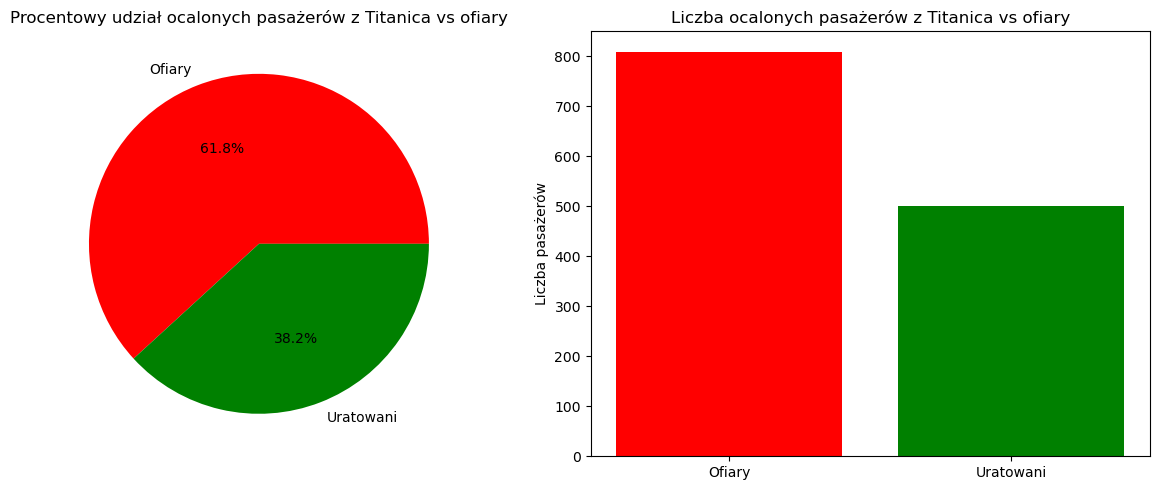

In [309]:
# Drop rows with NaN values in the 'survived' column
df_cleaned = df.dropna(subset=['survived'])

# Count the number of survivors and non-survivors
survival_counts = df_cleaned['survived'].value_counts()

# Tworzenie dwóch wykresów obok siebie
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Wykres kołowy
axs[0].pie(survival_counts, labels=labels, colors=["red","green"], autopct='%1.1f%%')
axs[0].set_title('Procentowy udział ocalonych pasażerów z Titanica vs ofiary')

# Create a pie chart
#plt.figure(figsize=(8, 8))
#plt.pie(survival_counts, labels=["Ofiary","Uratowani"], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
#plt.title('Procentowy udział uratowanych pasażerów z Titanica vs ofiary')

# Wykres słupkowy
axs[1].bar(labels, survival_counts, color=['red', 'green'])
axs[1].set_xlabel('')
axs[1].set_ylabel('Liczba pasażerów')
axs[1].set_title('Liczba ocalonych pasażerów z Titanica vs ofiary')

#for i, value in enumerate(survival_counts):
 #   axs[1].text(i, value + 10, str(value), ha='center', va='bottom', fontsize=10)

# Save the plot as a PNG file
#plt.savefig('survival_pie_chart.png')
plt.tight_layout()
plt.show()

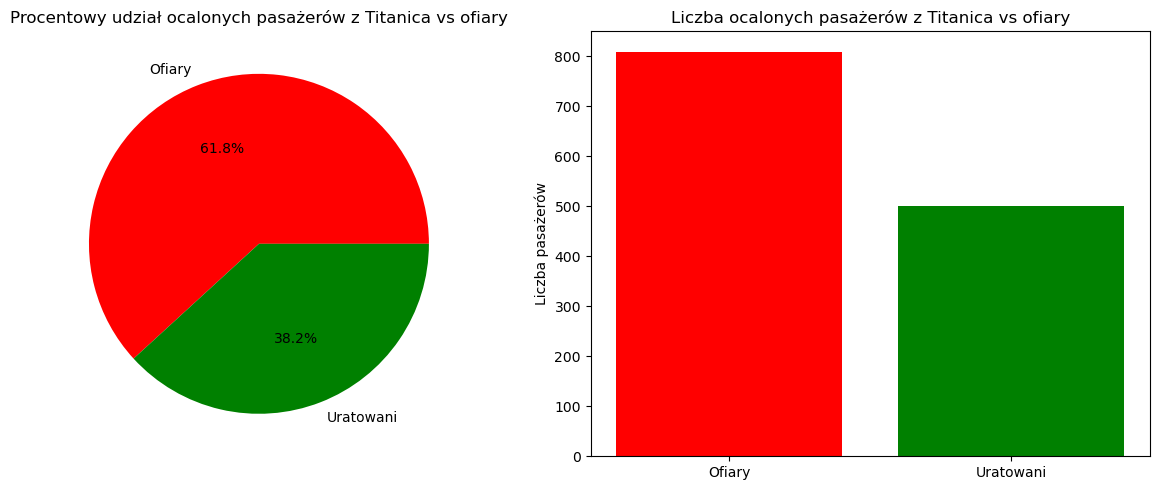

In [310]:
# Drop rows with NaN values in the 'survived' column
df_cleaned = df.dropna(subset=['survived'])

# Count the number of survivors and non-survivors
survival_counts = df_cleaned['survived'].value_counts()

# Tworzenie dwóch wykresów obok siebie
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Wykres kołowy
axs[0].pie(survival_counts, labels=labels, colors=["red","green"], autopct='%1.1f%%')
axs[0].set_title('Procentowy udział ocalonych pasażerów z Titanica vs ofiary')

# Create a pie chart
#plt.figure(figsize=(8, 8))
#plt.pie(survival_counts, labels=["Ofiary","Uratowani"], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
#plt.title('Procentowy udział uratowanych pasażerów z Titanica vs ofiary')

# Wykres słupkowy
axs[1].bar(labels, survival_counts, color=['red', 'green'])
axs[1].set_xlabel('')
axs[1].set_ylabel('Liczba pasażerów')
axs[1].set_title('Liczba ocalonych pasażerów z Titanica vs ofiary')

#for i, value in enumerate(survival_counts):
 #   axs[1].text(i, value + 10, str(value), ha='center', va='bottom', fontsize=10)

# Save the plot as a PNG file
#plt.savefig('survival_pie_chart.png')
plt.tight_layout()
plt.show()

Procent uratowanych pasażerów wynosi tylko 38,2%

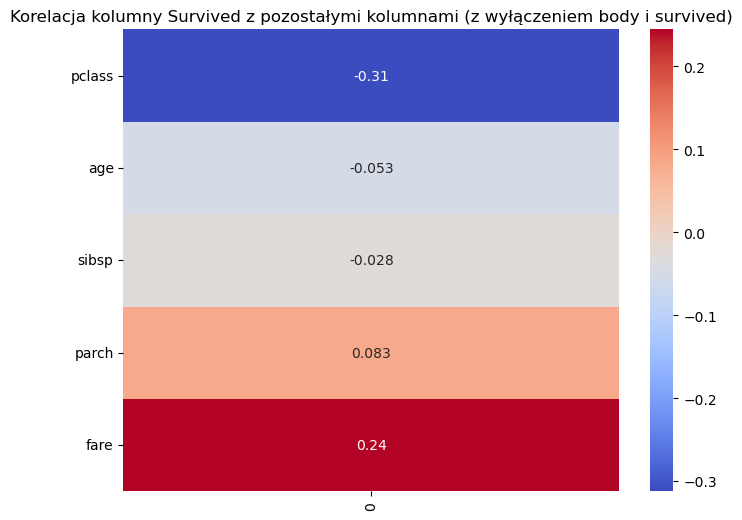

In [311]:
# Drop the 'body' and 'survived' columns
df_filtered = df.drop(columns=['body', 'survived'])

# Calculate the correlation matrix with respect to 'survived'
correlation_matrix = df_filtered.corrwith(df['survived'],numeric_only=True).dropna()

# Plot the correlation map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Korelacja kolumny Survived z pozostałymi kolumnami (z wyłączeniem body i survived)')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

Jak widać kolumna Survived wykazuje stosunkunkowo najwyższą ujemną korelację z klasą (to znaczy, że im niższy numer klasy tym większa była szansa przeżycia) i najwyższą dodatnią korelację z ceną biletu (to znaczy, że im wyższa cena tym większa była szansa przeżycia).

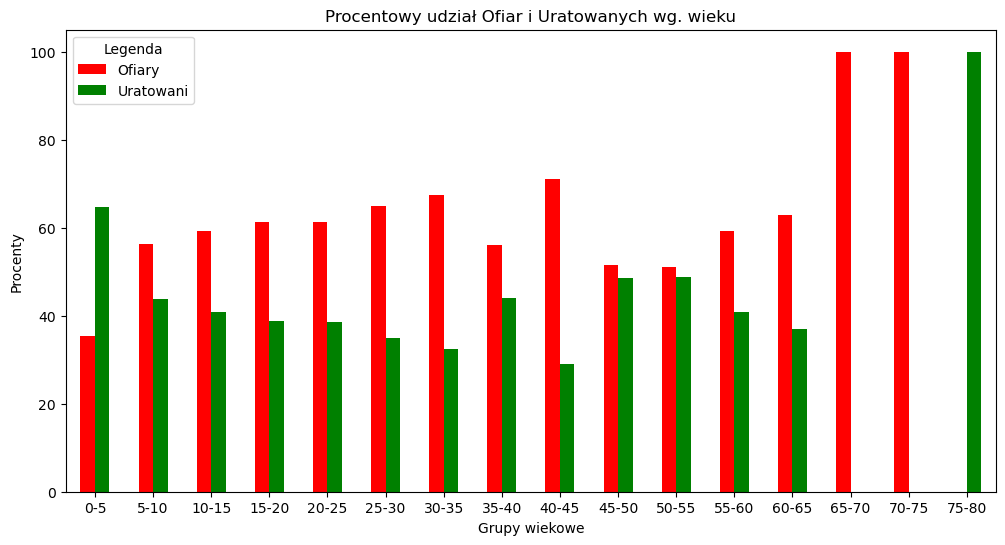

In [312]:
df = df.dropna(subset=['age', 'survived'])

# Create age bins with 5-year intervals
age_bins = np.arange(0, 85, 5)
age_labels = [f"{i}-{i+5}" for i in age_bins[:-1]]  # ['0-5', '5-10', ..., '80-85']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the percentage of survivors and victims in each age group
age_group_survival = (
    df.groupby('age_group')['survived']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

age_group_survival.plot(
    kind='bar',
    stacked=False,
    ax=ax,
    color=['red', 'green']
)

ax.set_title('Procentowy udział Ofiar i Uratowanych wg. wieku')
ax.set_xlabel('Grupy wiekowe')
ax.set_ylabel('Procenty')
ax.legend(['Ofiary', 'Uratowani'], title='Legenda')

# Ustaw etykiety osi X poziomo
plt.xticks(rotation=0)

plt.show()

Jeśli chodzi o przeżywalność w grupach wiekowych, to widać, że w przypadku grupy wiekowej 0-5 lat mamy największą przeżywalność, jeśli chodzi o przeżywalność w grupach 65-70, 70-75, 75-80 to ze względu na małą liczebność tych grup dane te nie są wiarygodne, bo mogą wynikać z indywidualnych decyzji o dobrowolnym pozostaniem na pokładzie.

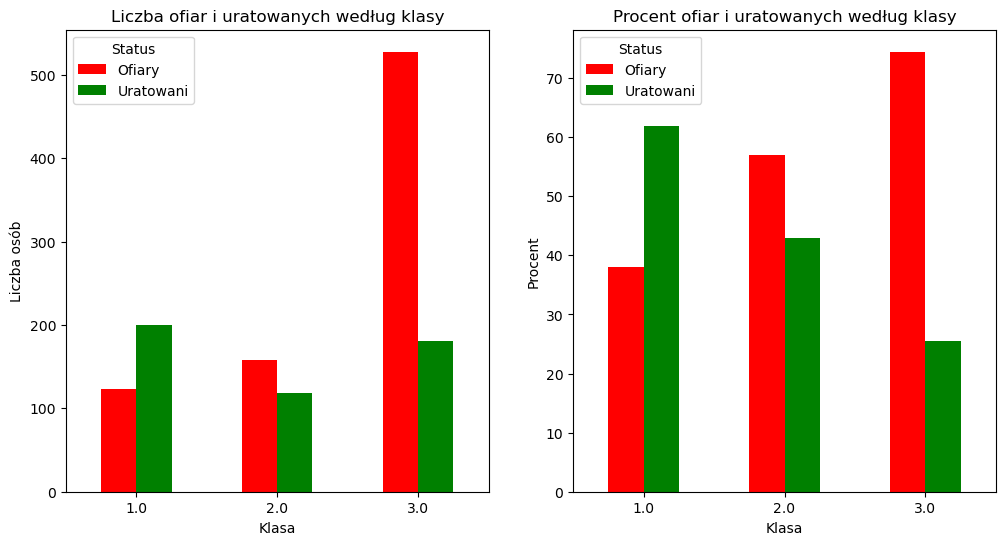

In [313]:
# TODO: import the required dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is already defined and contains the DataFrame
df = df

# Drop rows with NaN values in 'pclass' or 'survived' columns
df = df.dropna(subset=['pclass', 'survived'])

# Convert 'pclass' and 'survived' to integer for easier processing
df['pclass'] = df['pclass'].astype(int)
df['survived'] = df['survived'].astype(int)

# Group by 'pclass' and 'survived' to get counts
count_data = df.groupby(['pclass', 'survived']).size().unstack(fill_value=0)

# Calculate percentages
percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar plot for counts
count_data.plot(kind='bar', stacked=False, ax=axes[0], color=['red', 'green'])
axes[0].set_title('Liczba ofiar i uratowanych według klasy')
axes[0].set_xlabel('Klasa')
axes[0].set_ylabel('Liczba osób')
axes[0].legend(['Ofiary', 'Uratowani'], title='Status')
axes[0].set_xticklabels(grouped.index, rotation=0)

# Bar plot for percentages
percentage_data.plot(kind='bar', stacked=False, ax=axes[1], color=['red', 'green'])
axes[1].set_title('Procent ofiar i uratowanych według klasy')
axes[1].set_xlabel('Klasa')
axes[1].set_ylabel('Procent')
axes[1].legend(['Ofiary', 'Uratowani'], title='Status')
axes[1].set_xticklabels(grouped.index, rotation=0)

# Save the plot as a PNG file
#plt.tight_layout()
#plt.savefig('titanic_survival_by_class.png')
plt.show()

Jak widać procent uratowanych w klasie I jest zdecydowanie najwyższy (>60%) a w klasie III najniźszy (<30%)

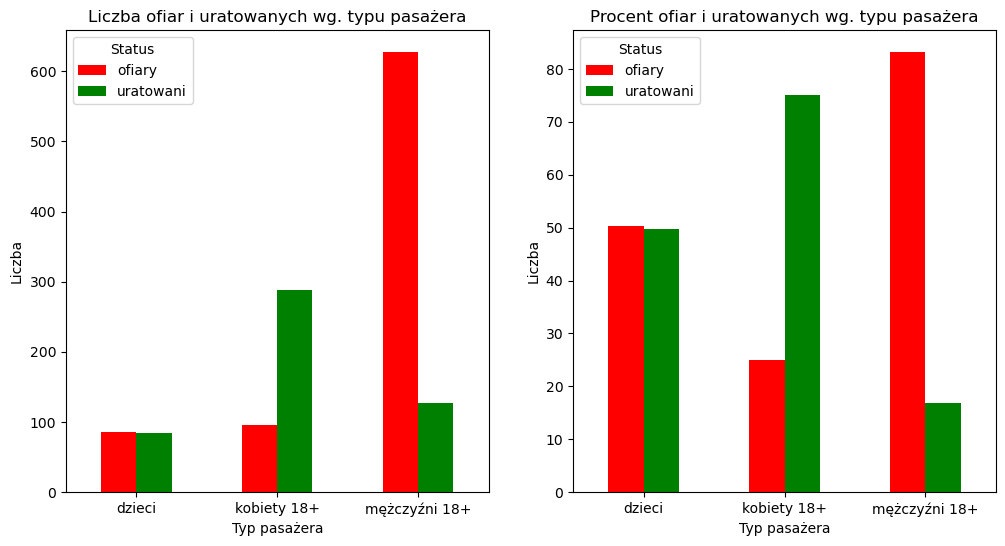

In [315]:
# Import the required dependencies
# Remove rows with missing 'age' or 'sex' values
df = df.dropna(subset=['age', 'sex'])

# Define age categories
def categorize_age(row):
    if row['age'] < 18:
        return 'dzieci'
    elif row['sex'] == 'male':
        return 'mężczyźni 18+'
    else:
        return 'kobiety 18+'

df['category'] = df.apply(categorize_age, axis=1)

# Group by category and survival status
grouped = df.groupby(['category', 'survived']).size().unstack(fill_value=0)

# Calculate percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar chart for counts
grouped.plot(kind='bar', stacked=False, ax=axes[0], color=['red', 'green'])
axes[0].set_title('Liczba ofiar i uratowanych wg. typu pasażera')
axes[0].set_ylabel('Liczba')
axes[0].set_xlabel('Typ pasażera')
axes[0].legend(['ofiary', 'uratowani'], title='Status')
axes[0].set_xticklabels(grouped.index, rotation=0)

# Bar chart for percentages
percentages.plot(kind='bar', stacked=False, ax=axes[1], color=['red', 'green'])
axes[1].set_title('Procent ofiar i uratowanych wg. typu pasażera')
axes[1].set_ylabel('Liczba')
axes[1].set_xlabel('Typ pasażera')
axes[1].legend(['ofiary', 'uratowani'], title='Status')
axes[1].set_xticklabels(grouped.index, rotation=0)

# Save the plot as a PNG file
#plt.tight_layout()
#plt.savefig('survival_analysis.png')
plt.show()

Jeśli chodzi o przeżywalność w podziale na grupy: dzieci, kobiety, mężczyźni, to zadziwiające dla mnie, że największa była przeżywalność kobiet (ok 75%), zdecydowanie wyższa niż dzieci (niecałe 50%) i mężczyzn (mniej niż 20%).

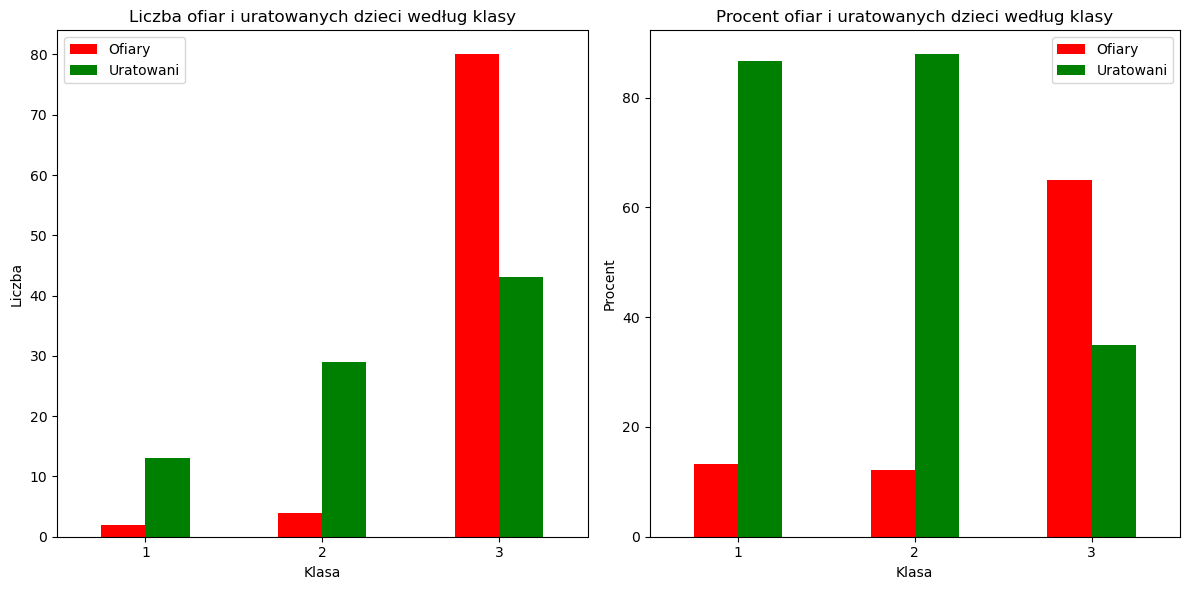

In [316]:
## narysuj Wykres słupkowy pokazujący dla każdej klasy w osobnych słupkach ilość ofiar i uratowanych (dzieci - osób w wieku poniżej18 lat) i obok Wykres słupkowy pokazujący dla każdej klasy w osobnych słupkach procent ofiar i uratowanych (dzieci - osób w wieku poniżej 18 lat)
# Filter the data for children (age < 18)
children_df = df[df['age'] < 18]

# Group by class and survival status
grouped = children_df.groupby(['pclass', 'survived']).size().unstack(fill_value=0)

# Calculate percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar chart for counts
grouped.plot(kind='bar', stacked=False, ax=axes[0], color=['red', 'green'])
axes[0].set_title('Liczba ofiar i uratowanych dzieci według klasy')
axes[0].set_xlabel('Klasa')
axes[0].set_ylabel('Liczba')
axes[0].legend(['Ofiary', 'Uratowani'])
axes[0].set_xticklabels(grouped.index, rotation=0)

# Bar chart for percentages
percentages.plot(kind='bar', stacked=False, ax=axes[1], color=['red', 'green'])
axes[1].set_title('Procent ofiar i uratowanych dzieci według klasy')
axes[1].set_xlabel('Klasa')
axes[1].set_ylabel('Procent')
axes[1].legend(['Ofiary', 'Uratowani'])
axes[1].set_xticklabels(grouped.index, rotation=0)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('children_survival_by_class.png')

Procent uratowanych dzieci w klasie I i II jest podobny (ponad 86%) i jest dużo wyższy niż w klasie III (poniżej 35%)

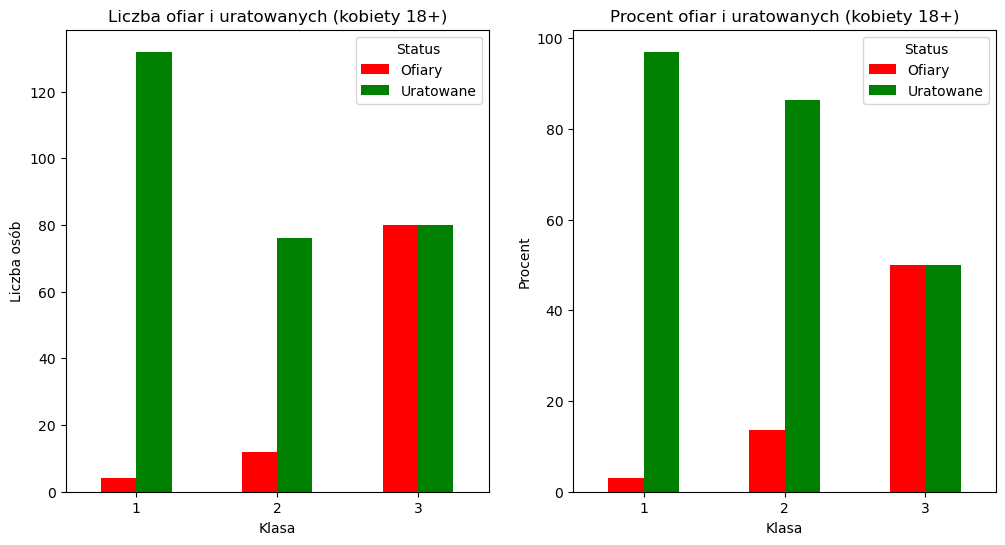

In [317]:
##narysuj Wykres słupkowy pokazujący dla każdej klasy w osobnych słupkach ilość ofiar 
#i uratowanych (kobiet w wieku 18 lat i powyżej) i obok Wykres słupkowy pokazujący dla każdej klasy w osobnych słupkach procent ofiar i uratowanych (kobiet w wieku 18 lat i powyżej)
# Filter the data for women aged 18 and above
women_adults = df[(df['sex'] == 'female') & (df['age'] >= 18)]

# Group by class and survival status
grouped = women_adults.groupby(['pclass', 'survived']).size().unstack(fill_value=0)

# Calculate percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar chart for counts
grouped.plot(kind='bar', stacked=False, ax=axes[0], color=['red', 'green'])
axes[0].set_title('Liczba ofiar i uratowanych (kobiety 18+)')
axes[0].set_xlabel('Klasa')
axes[0].set_ylabel('Liczba osób')
axes[0].legend(['Ofiary', 'Uratowane'], title='Status')
axes[0].set_xticklabels(grouped.index, rotation=0)

# Bar chart for percentages
percentages.plot(kind='bar', stacked=False, ax=axes[1], color=['red', 'green'])
axes[1].set_title('Procent ofiar i uratowanych (kobiety 18+)')
axes[1].set_xlabel('Klasa')
axes[1].set_ylabel('Procent')
axes[1].legend(['Ofiary', 'Uratowane'], title='Status')
axes[1].set_xticklabels(grouped.index, rotation=0)

# Save the plot as a PNG file
plt.show()

Procent uratowanych kobiet w klasie I wynosi prawie 97%, w II (ponad 86%) i w klasie III (50%) i jest to wyższy procent niż odpowiednio dzieci w I i III klasie.

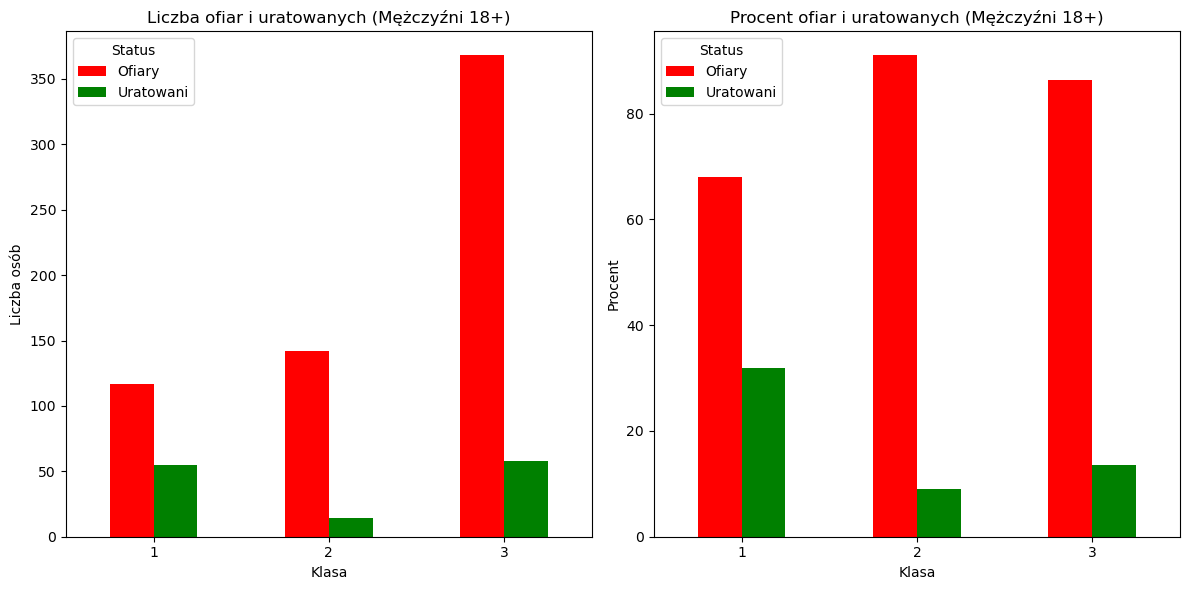

In [318]:
#narysuj Wykres słupkowy pokazujący dla każdej klasy w osobnych słupkach ilość 
#ofiar i uratowanych (mężczyzn w wieku 18 lat i powyżej) i obok Wykres słupkowy pokazujący dla każdej klasy w osobnych słupkach procent ofiar i uratowanych (mężczyzn w wieku 18 lat i powyżej)
# Filter the data for men aged 18 and above
men_adults = df[(df['sex'] == 'male') & (df['age'] >= 18)]

# Group by class and survival status
grouped = men_adults.groupby(['pclass', 'survived']).size().unstack(fill_value=0)

# Calculate percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar chart for counts
grouped.plot(kind='bar', stacked=False, ax=axes[0], color=['red', 'green'])
axes[0].set_title('Liczba ofiar i uratowanych (Mężczyźni 18+)')
axes[0].set_xlabel('Klasa')
axes[0].set_ylabel('Liczba osób')
axes[0].legend(['Ofiary', 'Uratowani'], title='Status')
axes[0].set_xticklabels(grouped.index, rotation=0)

# Bar chart for percentages
percentages.plot(kind='bar', stacked=False, ax=axes[1], color=['red', 'green'])
axes[1].set_title('Procent ofiar i uratowanych (Mężczyźni 18+)')
axes[1].set_xlabel('Klasa')
axes[1].set_ylabel('Procent')
axes[1].legend(['Ofiary', 'Uratowani'], title='Status')
axes[1].set_xticklabels(grouped.index, rotation=0)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('men_adults_survival.png')

Procent uratowanych mężczyzn w klasie I wynosi prawie 32%, w II (niecałe 9%) i w klasie III (niecałe 14%).

In [319]:
#Teza: Dorosły mężczyzna z klasy I miał większe szanse przeżycia niż dziecko z klasy III

# Filter for adult men in first class
adult_men_first_class = df[(df['pclass'] == 1) & (df['sex'] == 'male') & (df['age'] >= 18)]

# Calculate survival rate for adult men in first class
survival_rate_adult_men_first_class = adult_men_first_class['survived'].mean() * 100

# Filter for children in third class
children_third_class = df[(df['pclass'] == 3) & (df['age'] < 18)]

# Calculate survival rate for children in third class
survival_rate_children_third_class = children_third_class['survived'].mean() * 100

# Declare result var
result = {
    "type": "dataframe",
    "value": pd.DataFrame({
        "Group": ["Adult Men in First Class", "Children in Third Class"],
        "Survival Rate (%)": [survival_rate_adult_men_first_class, survival_rate_children_third_class]
    })
}

adult_men_survival = result["value"].loc[
    result["value"]["Group"] == "Adult Men in First Class", 
    "Survival Rate (%)"
].values[0]

print(f"Procent przeżywalności dorosłych mężczyzn z klasy I: {adult_men_survival:.2f}%")
# Pobranie survival rate dla dzieci w 3 klasie
children_survival = result["value"].loc[
    result["value"]["Group"] == "Children in Third Class", 
    "Survival Rate (%)"
].values[0]

# Formatowanie do 2 miejsc po przecinku
print(f"Procent przeżywalności dzieci z klasy III: {children_survival:.2f}%")

Procent przeżywalności dorosłych mężczyzn z klasy I: 31.98%
Procent przeżywalności dzieci z klasy III: 34.96%


### 5. Wnioski i rekomendacje
    
Jeśli chodzi o uratowanych, to nie widać większej zależności od wieku. Zdecydowanie o uratowaniu decydował typ/płeć pasażera - z preferencją kobiet i dzieci oraz klasa którą podróżował pasażer (preferecja klasy I i II).
Najwięcej ofiar przypadało dość niespodziewanie na mężczyzn z klasy II (ponad 91%), najmniej na kobiety z klasy I (poniżej 3%). Osoby z klasy III miały utrudniony dostęp do szalup (nie mogły samodzielnie się dostać na pokład z szalupami).
Nie mamy dokładnej informacji o pojemności szalup (czy szalupa mieściła 55 osób). W załączonym pliku brak jest teź informacji o uratowanych członkach załogi (i ilu ich było na poszczególnych szalupach). 
Można jednakże stwierdzić, że decydujące były zaniedbania armatora - lini White Star, w zakresie umieszczenia niewystarczającej liczby szalup i w słabym przeszkoleniu załogi w zakresie procedur ewakuacji (np. brak informacji o możliwości opuszczania szalup z pełnym ładunkiem). Sama akcja ratunkowa nie była prowadzona wystarczająco energicznie - zwłaszcza w początkowym okresie (a konstruktor statku dość szybko ocenił, że Titanic zatonie za ok 2 godziny). Karygodne było niepełne załadowanie szalup, co sugeruje poniższy wykres. Można było rozważyć niekonwecjonalne działania jak przejście części pasażerów na górę lodową (puki nie zdryfowała zbyt daleko). Ocalałych uratował niedawny wynalazek - czyli radio.


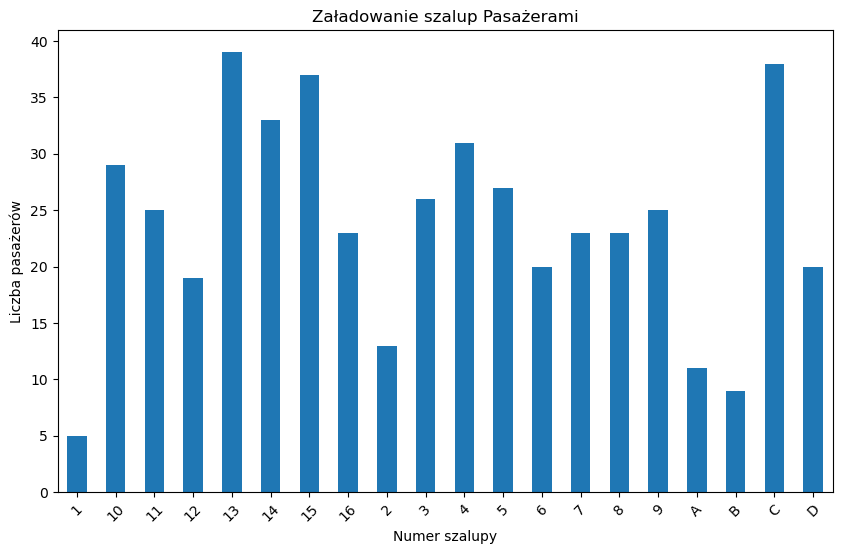

In [320]:
# Filter out rows where 'boat' is NaN and where 'boat' contains spaces
filtered_df = df[df['boat'].notna() & ~df['boat'].astype(str).str.contains(' ')]
# Count occurrences of each boat number
boat_counts = filtered_df['boat'].value_counts().sort_index()
# Plotting
plt.figure(figsize=(10, 6))
boat_counts.plot(kind='bar')
plt.title('Załadowanie szalup Pasażerami')
plt.xlabel('Numer szalupy')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=45)
plt.show()

### 6. Raportowanie i prezentacja wyników

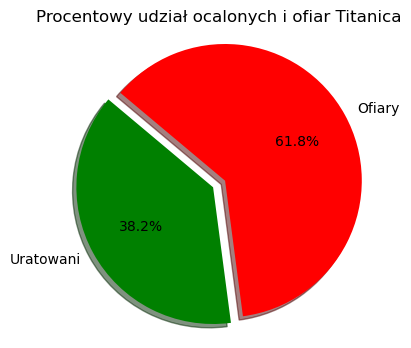

In [327]:
# Calculate the number of survivors and victims
survivors = df['survived'].sum()
victims = len(df) - survivors

# Create a pie chart
labels = ['Uratowani', 'Ofiary']
sizes = [survivors, victims]
colors = ["green", "red"]
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Procentowy udział ocalonych i ofiar Titanica')
# Wykres kołowy
#axs.pie(survival_counts, labels=labels, colors=["red","green"], autopct='%1.1f%%')
#axs.set_title('Procentowy udział ocalonych pasażerów z Titanica vs ofiary')
plt.show()

Niech powyższy wykres będzie ostrzeżeniem, że nie ma niezatapialnych statków i że najgorzej jest uwierzyć we własną propagandę. Oraz, że zawsze trzeba zapewnić wystarczającą ilość środków ratunkowych.